In [4]:
using CairoMakie
include("src/parameters.jl")
include("src/filament_state.jl")

Ri_min (generic function with 1 method)

In [100]:
sp = create_simulation_parameters(; Ri=0.6, Ro=3, α=1)
(b, v) = get_filament_state(sp)
xs = range(-3, 3, 1024)
zs = range(-1.5sp.H, 0, 256)
@inline ∂x(a) = (x, z) -> (a(x+5e-4, z) - a(x-5e-4, z)) / 1e-3
@inline ∂z(a) = (x, z) -> (a(x, z+5e-4) - a(x, z-5e-4)) / 1e-3
@inline PV(b, v) = (x, z) -> (∂x(v)(x, z) + 1) * ∂z(b)(x, z) - ∂z(v)(x, z) * ∂x(b)(x, z)
@inline invRi(b, v) = (x, z) -> ∂z(v)(x, z) * ∂z(v)(x, z) / ∂z(b)(x, z);

┌ Info: Created simulation parameters
│ Input:
│  Ro=3
│  Ri=0.6
│  Ek=nothing
│  α=1
│  λ=0.05
│  δ=-0.25
│ Output:
│  L=1
│  f=1
│  H=0.1
│  δH=-0.025
│  N₀=36.07338379275254
│  Nb=9.642188983508152
│  ℓ=1
│  ν=nothing
└  Lz=0.25
[ Info: Filament state created: Ro=3.0000435784727557, Ro_min=0.9413375104008193, Fr₀=0.08316501705824146, Frb=0.3111371892423995, Ri_min=0.6000747069688419


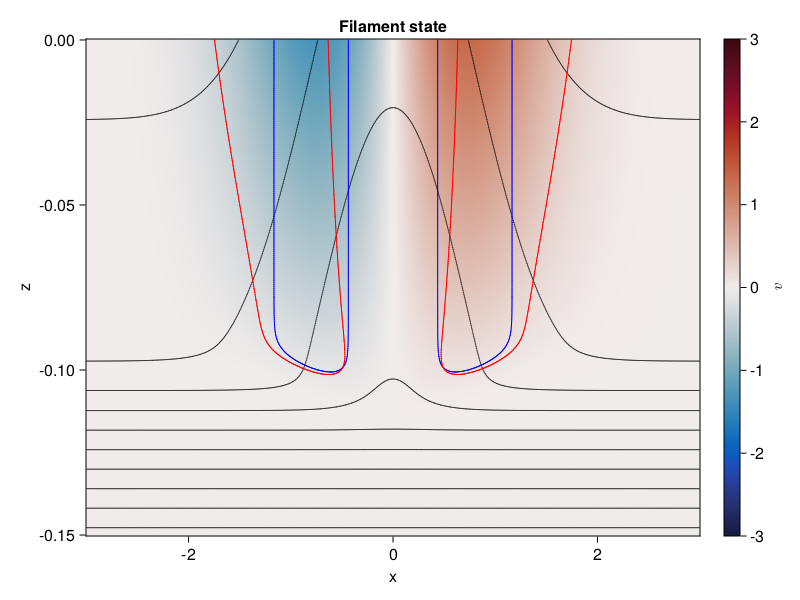

In [101]:
fig = Figure()
ax = Axis(fig[1, 1]; title="Filament state", xlabel="x", ylabel="z")
ht = heatmap!(ax, xs, zs, v; colormap=:balance, colorrange=(-3, 3))
contour!(ax, xs, zs, b; color=(:black, 0.5), levels=range(-400, -100, 40))
contour!(ax, xs, zs, invRi(b, v); color=:blue, levels=[1/0.95])
contour!(ax, xs, zs, PV(b, v); color=:red, levels=[0])
Colorbar(fig[1, 2], ht; label=L"v")
fig

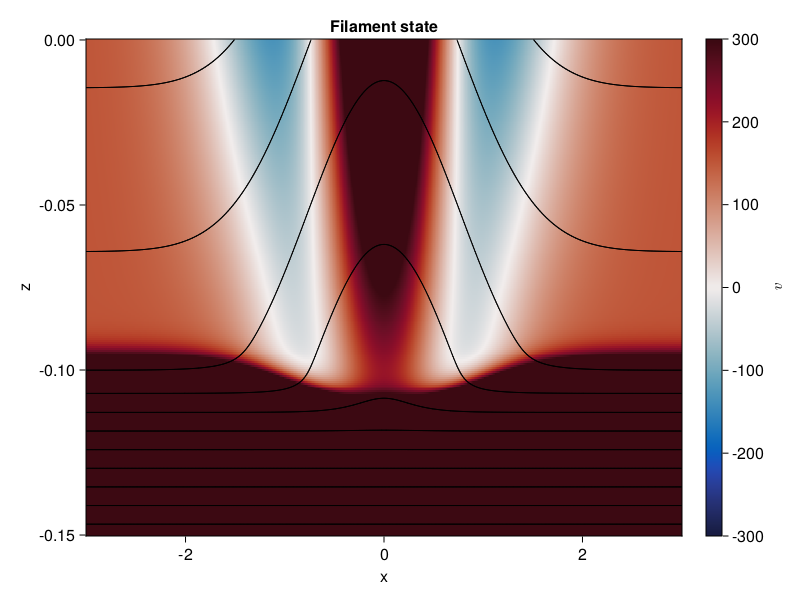

In [73]:
fig = Figure()
ax = Axis(fig[1, 1]; title="Filament state", xlabel="x", ylabel="z")
ht = heatmap!(ax, xs, zs, PV(b, v); colormap=:balance, colorrange=(-300, 300))
contour!(ax, xs, zs, b; color=:black, levels=range(-400, -100, 40))
Colorbar(fig[1, 2], ht; label=L"q")
fig

In [45]:
?heatmap

search: heatmap heatmap! Heatmap



```
heatmap(x, y, values)
heatmap(values)
```

Plots a heatmap as an image on `x, y` (defaults to interpretation as dimensions).

## Attributes

### Specific to `Heatmap`

  * `lowclip::Union{Nothing, Symbol, <:Colorant} = nothing` sets a color for any value below the colorrange.
  * `highclip::Union{Nothing, Symbol, <:Colorant} = nothing` sets a color for any value above the colorrange.
  * `interpolate::Bool = false` sets whether colors should be interpolated.

### Generic

  * `visible::Bool = true` sets whether the plot will be rendered or not.
  * `overdraw::Bool = false` sets whether the plot will draw over other plots. This specifically means ignoring depth checks in GL backends.
  * `transparency::Bool = false` adjusts how the plot deals with transparency. In GLMakie `transparency = true` results in using Order Independent Transparency.
  * `fxaa::Bool = true` adjusts whether the plot is rendered with fxaa (anti-aliasing).
  * `inspectable::Bool = true` sets whether this plot should be seen by `DataInspector`.
  * `depth_shift::Float32 = 0f0` adjusts the depth value of a plot after all other transformations, i.e. in clip space, where `0 <= depth <= 1`. This only applies to GLMakie and WGLMakie and can be used to adjust render order (like a tunable overdraw).
  * `model::Makie.Mat4f` sets a model matrix for the plot. This replaces adjustments made with `translate!`, `rotate!` and `scale!`.
  * `color` is set by the plot.
  * `colormap::Union{Symbol, Vector{<:Colorant}} = :viridis` sets the colormap that is sampled for numeric `color`s.
  * `colorrange::Tuple{<:Real, <:Real}` sets the values representing the start and end points of `colormap`.
  * `nan_color::Union{Symbol, <:Colorant} = RGBAf(0,0,0,0)` sets a replacement color for `color = NaN`.
  * `space::Symbol = :data` sets the transformation space for the position of the heatmap. See `Makie.spaces()` for possible inputs.
